# Binary Predictino of Poisonous Mushrooms

[Competition Link](https://www.kaggle.com/competitions/playground-series-s4e8/data)

Goal of the competition is to predict if a mushroom is poisonous or not based on various mushroom parameters.

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 12/08/24   | Martin |   Created   | Notebook created. EDA techniques | 

# Content

* [Exploratory Data Analysis](#exploratory-data-analytics)

# Exploratory Data Analysis

First we perform some exploration on the dataset to get a better sense of what features might be useful for prediction.

* _Dependent Variable: class: edible (e) or poisonous (p)_


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/train.csv")

In [3]:
# Get a list of all columns and respective data types
df.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [4]:
df.count()

id                      3116945
class                   3116945
cap-diameter            3116941
cap-shape               3116905
cap-surface             2445922
cap-color               3116933
does-bruise-or-bleed    3116937
gill-attachment         2593009
gill-spacing            1858510
gill-color              3116888
stem-height             3116945
stem-width              3116945
stem-root                359922
stem-surface            1136084
stem-color              3116907
veil-type                159452
veil-color               375998
has-ring                3116921
ring-type               2988065
spore-print-color        267263
habitat                 3116900
season                  3116945
dtype: int64

In [5]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


Explore distribution of target variable.

Graph shows that there is no significant difference in the number of data points provided between classes

Text(0.5, 1.0, 'Count of Class variable')

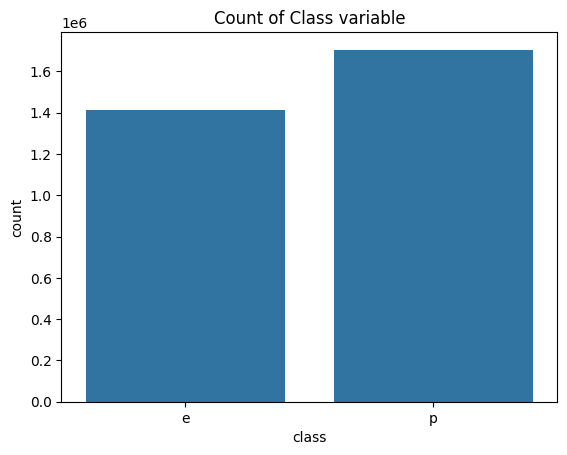

In [6]:
sns.countplot(df, x='class').set_title("Count of Class variable")

## Numerical Variables

Explore the numerical variables first:

* cap-diameter
* stem-height
* stem-width

Methods:

* Histogram plots - identify if there are any significant difference between the distributions from each class
* Boxplots - identify any differences in the quantiles for each class
* QQ-plot - check if the distributions for each numerical variable is sampled from a Gaussian distribution

### Histograms

In [8]:
def overlapping_histogram(df, plot_var, class_var, classes=None, granular=100):

  bins = np.linspace(df[plot_var].min(), df[plot_var].max(), granular)
  fig, ax = plt.subplots()

  for i in classes:
    df_classes = df[df[class_var] == i]
    ax.hist(df_classes[plot_var], bins, alpha=0.5, label=i)

  ax.legend(loc='upper right')
  ax.set_title(f"Plot of Histogram for {plot_var}")
  plt.show()

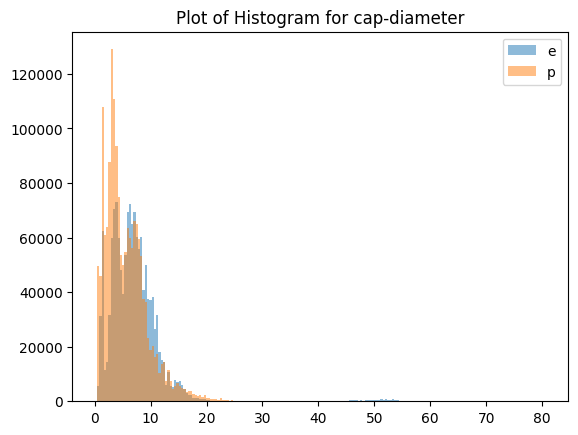

In [9]:
overlapping_histogram(df, 'cap-diameter', 'class', ['e', 'p'], 200)

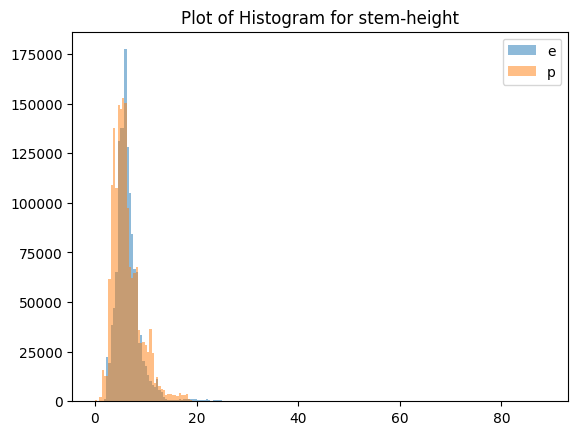

In [10]:
overlapping_histogram(df, 'stem-height', 'class', ['e', 'p'], 200)

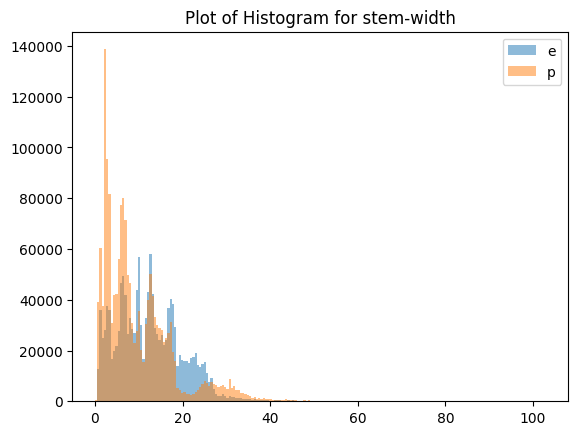

In [11]:
overlapping_histogram(df, 'stem-width', 'class', ['e', 'p'], 200)

Histogram plot suggests that there might not be significant difference in the distribution between classes individually. But there might be some outliers. So explore that now

In [12]:
# Check for cap-diameter that's > 30
df_cap = df[df['cap-diameter'] > 30]

df_cap.groupby('class').count()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,,,,,,,,,,,,,,,,,,,,,
e,12765,12765,12765,12749,12765,12765,12734,43,12765,12765,...,6,12215,12765,0,2,12765,12765,5,12765,12765
p,267,267,267,266,267,267,264,27,267,267,...,4,214,267,0,0,267,266,2,267,267


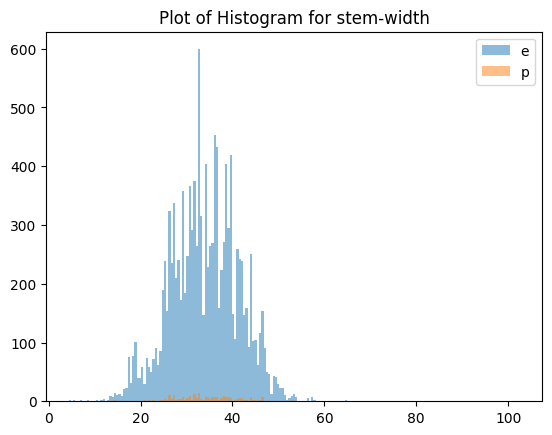

In [13]:
overlapping_histogram(df_cap, 'stem-width', 'class', ['e', 'p'], 200)

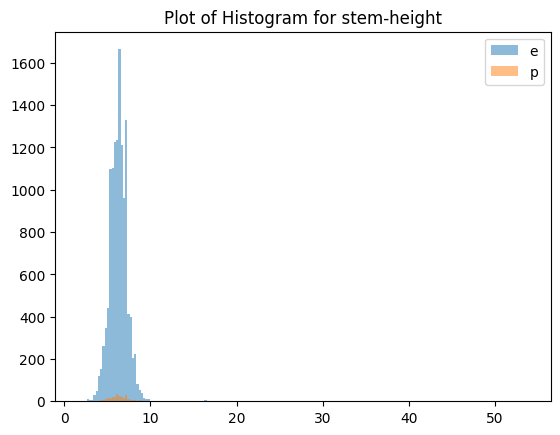

In [14]:
overlapping_histogram(df_cap, 'stem-height', 'class', ['e', 'p'], 200)

Histogram plots suggest that those with `cap-diameter` >30 (and correspondingly the other numerical variables) might be skewed data and unrepresentative of the actual distribution.

After removing the distribution looks like this:

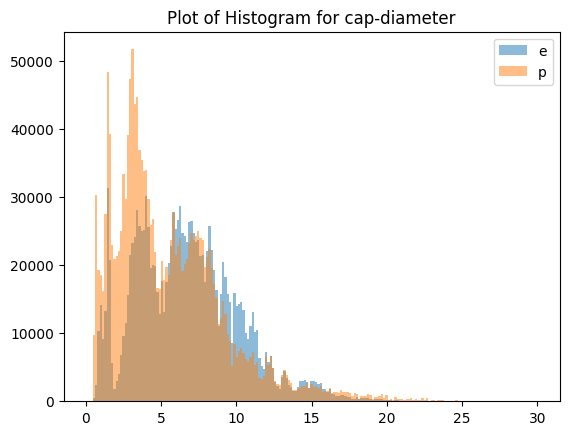

In [15]:
df_capr = df[df['cap-diameter'] < 30]

overlapping_histogram(df_capr, 'cap-diameter', 'class', ['e', 'p'], 200)

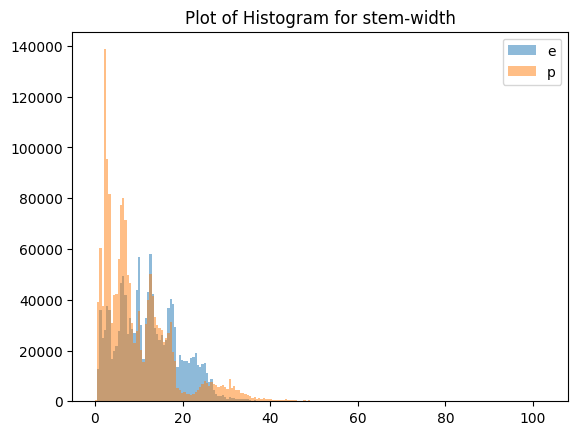

In [16]:
overlapping_histogram(df_capr, 'stem-width', 'class', ['e', 'p'], 200)

Conclusions:

1. A lot of poisonous (p) mushrooms have smaller `stem-width` and `cap-diameters`
2. Even distribution between poisonous and edible mushrooms 
3. Larger mushorooms tend to be poisonous (after removing >30 cap-diameter)

### Boxplots

<Axes: xlabel='class', ylabel='cap-diameter'>

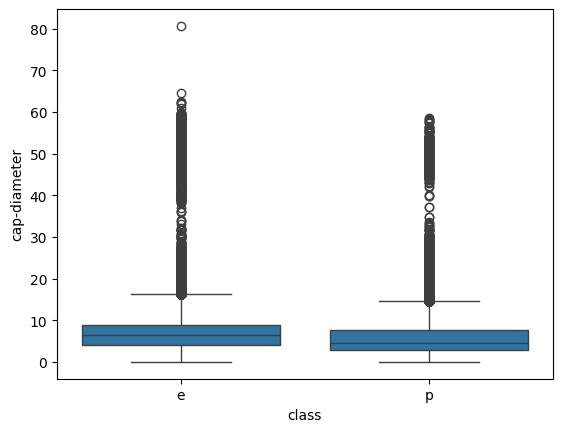

In [18]:
sns.boxplot(df, x='class', y='cap-diameter')

<Axes: xlabel='class', ylabel='cap-diameter'>

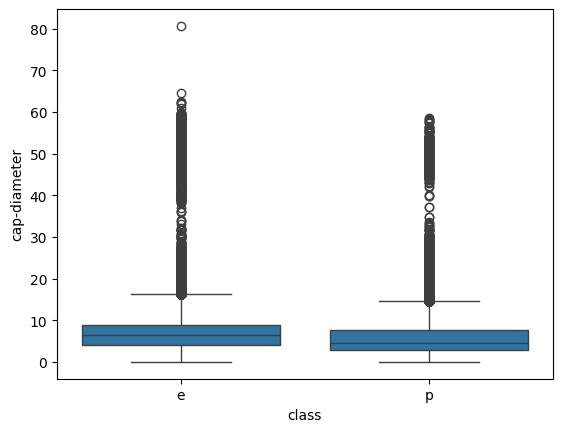

In [29]:
sns.boxplot(df, x='class', y='cap-diameter')

<Axes: xlabel='class', ylabel='cap-diameter'>

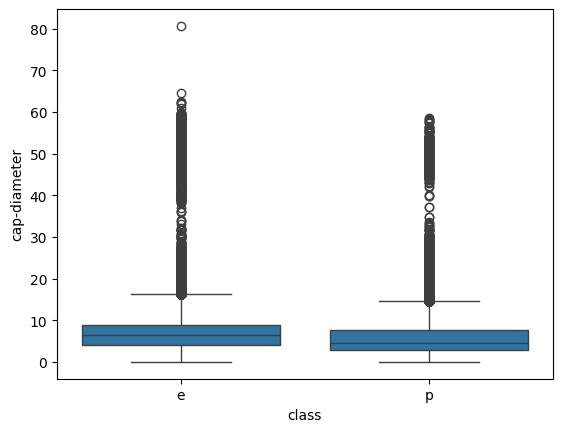

In [30]:
sns.boxplot(df, x='class', y='cap-diameter')

Boxplots show a lot of outliers across the different numerical variables. 

Conclusion:
* Suggestion to observe them as 2 separate datasets

In [2]:
df_numb = df[
  (df['cap-diameter'] < 20) &
  (df['stem-width'] < 40) &
  (df['stem-height'] < 10)
]

df_numa = df[
  (df['cap-diameter'] >= 20) &
  (df['stem-width'] >= 40) &
  (df['stem-height'] >= 10)
]

### QQ Plot

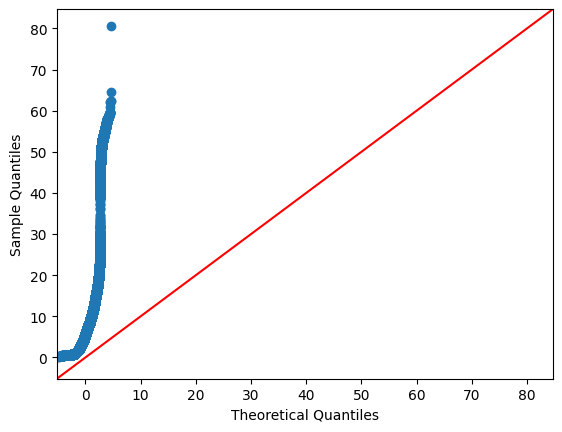

In [4]:
from statsmodels.api import qqplot

qqplot(df['cap-diameter'], line='45')
plt.show()

Obvious left skew due to outliers. Now try with the separated dataframes

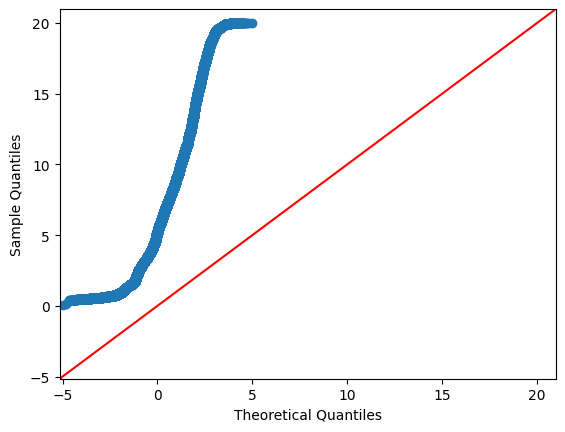

In [39]:
qqplot(df_numb['cap-diameter'], line='45')
plt.show()

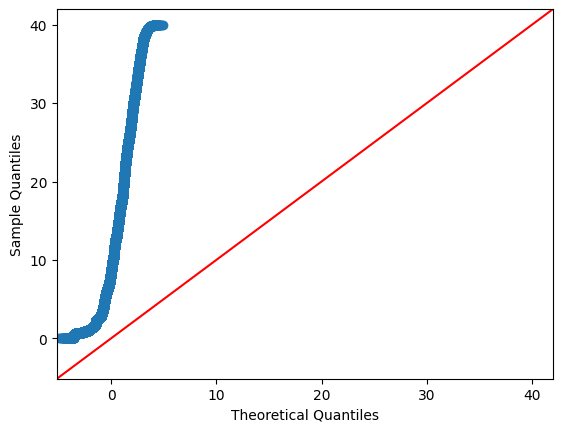

In [40]:
qqplot(df_numb['stem-width'], line='45')
plt.show()

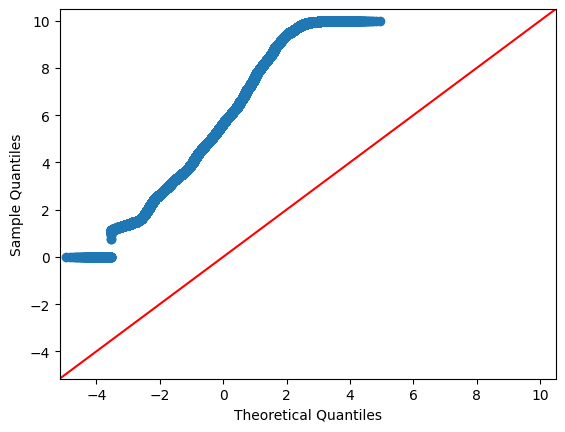

In [41]:
qqplot(df_numb['stem-height'], line='45')
plt.show()

All seem to suggest that these might be light tailed with a left skew for a normal distribution. Consider performing some transformations to see there is some improvement

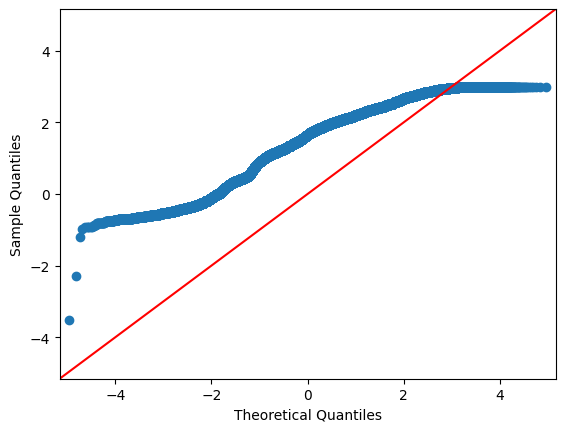

In [6]:
var = 'cap-diameter'

data = np.log(df_numb[var])
qqplot(data, line='45')
plt.show()

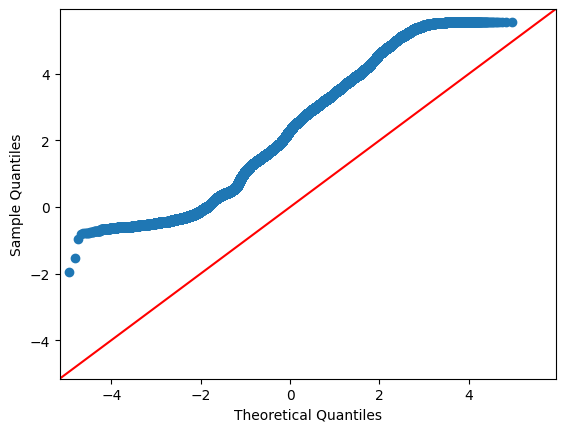

In [10]:
from scipy.stats import boxcox, boxcox_normmax

data = boxcox(df_numb[var])
qqplot(data[0], line='45')
plt.show()

Conclusion:

1. All seem to suggest that these might be light tailed with a left skew for a normal distribution
2. Boxcox transforamtion seems to have improved the distribution slightly, but still similar observation for light tailed, left skewness

### Statistical Tests

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [ ]:
# try gamma test
# converting gamma to normal
# what happens if a variable is gamma/ normal


### Pairwise Plot